In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [87]:
# Load the data from the CSV file
data = pd.read_csv("vaccinattion_data_by_year.csv")
data.head()

,location,year,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_population
0,Alabama,2021,58.51,47.63,4.903032e+06
1,Alabama,2022,64.83,53.02,4.902810e+06
2,Alabama,2023,65.07,53.22,4.903281e+06
3,Alaska,2021,65.03,56.33,7.314901e+05
4,Alaska,2022,72.75,64.95,7.315601e+05


In [88]:
# Select features and target
from sklearn.preprocessing import StandardScaler
X = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), ['year','people_vaccinated_per_hundred', 'total_population']]
y = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), 'people_fully_vaccinated_per_hundred']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model on data from 2021 and 2022
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

In [89]:
X_test = data.loc[data['year'] == 2023,['year','people_vaccinated_per_hundred', 'total_population']]
y_test = data.loc[data['year'] == 2023,'people_fully_vaccinated_per_hundred']

In [90]:
X_new_scaled = scaler.transform(X_test)
y_pred = model.predict(X_new_scaled)

In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

3.4968076693877808

In [92]:
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_pred)
r2

0.9609227440938788

In [93]:
predictions = dict(zip(data.loc[data['year'] == 2023, 'location'], y_pred))

In [ ]:
# Create a new DataFrame with predicted values
predictions_df = pd.DataFrame({'state': list(predictions.keys()), 'people_vaccinated_per_hundred_prediction_2023': list(predictions.values())})

# Save to CSV file
predictions_df.to_csv('predictions_2023.csv', index=False)

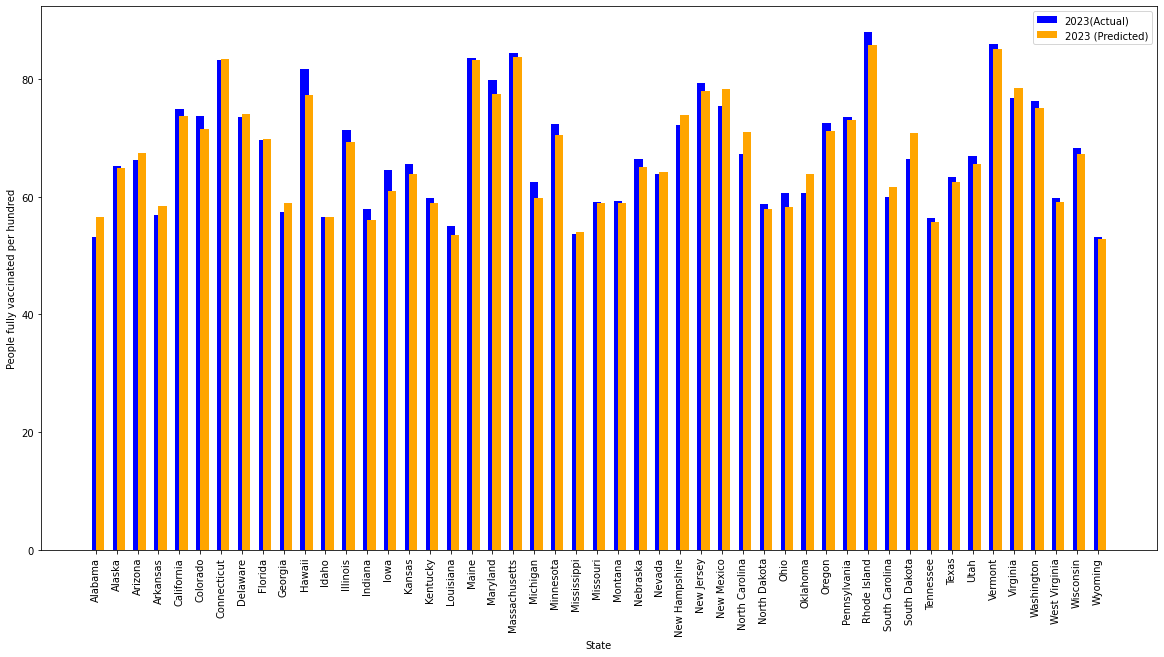

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x-coordinates for bars
x1 = np.arange(len(predictions))  # for 2023 values
x2 = x1 + 0.2  # for predicted 2024 values, shifted 0.2 to the right

# Plot bar graph for 2023 and predicted 2024 values
plt.figure(figsize=(20,10))
plt.bar(x1, y_test, 
        color='blue', width=0.4, label='2023(Actual)')
plt.bar(x2, y_pred, 
        color='orange', width=0.4, label='2023 (Predicted)')
plt.xticks(x1, predictions.keys(), rotation=90)
plt.xlabel('State')
plt.ylabel('People fully vaccinated per hundred')
plt.legend()
plt.show()

In [96]:
from sklearn.linear_model import LinearRegression
# Select features and target
X = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), ['year','people_vaccinated_per_hundred', 'total_population']]
y = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), 'people_fully_vaccinated_per_hundred']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Make predictions on data from 2023
X_test = data.loc[data['year'] == 2023,['year','people_vaccinated_per_hundred', 'total_population']]
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
# Calculate MSE and R2 score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 9.832152976277534
R2 Score: 0.8901244808727509


In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# Select features and target
X = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), ['year','people_vaccinated_per_hundred', 'total_population']]
y = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), 'people_fully_vaccinated_per_hundred']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

# Print evaluation metrics
print("MSE: ", mse)
print("R2 Score: ", r2)

MSE:  11.438350000000002
R2 Score:  0.8908914434535677


In [98]:
from sklearn.ensemble import GradientBoostingRegressor
# Select features and target
X = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), ['year','people_vaccinated_per_hundred', 'total_population']]
y = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), 'people_fully_vaccinated_per_hundred']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

# Print evaluation metrics
print("MSE: ", mse)
print("R2 Score: ", r2)

MSE:  10.17168347999745
R2 Score:  0.902973968959709
